<a href="https://colab.research.google.com/github/PawandeepKaur2405/fuel_estimation_project/blob/main/first_ml_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective: 
The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes

In [ ]:
# wget is used to fetch data from a URL
!pip install wget

If we wish to check the environment, we will be working in

In [ ]:
# conda info

In [ ]:
# importing necessary libraries
import numpy as np                # It is used for mathematical operations
import pandas as pd               # It is used for dataframe related task
import matplotlib.pyplot as plt   # It is used for visualization purpose
import seaborn as sns             # It is used for visualization purpose

Fetching data

In [ ]:
!wget "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

--2021-08-12 12:01:12--  http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30286 (30K) [application/x-httpd-php]
Saving to: ‘auto-mpg.data’

auto-mpg.data       100%[===================>]  29.58K  --.-KB/s    in 0.1s    

2021-08-12 12:01:13 (229 KB/s) - ‘auto-mpg.data’ saved [30286/30286]



In [ ]:
# defining the column names
cols = ['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model Year', 'Origin']

# reading the .data file using pandas
df = pd.read_csv('./auto-mpg.data', names=cols, na_values = "?", comment = '\t', sep= " ", skipinitialspace=True)

# making a copy of the dataframe
data = df.copy()

In [ ]:
# looking into the data
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [ ]:
# checking the data info
data.info()

In [ ]:
# checking for all the null values
data.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

Here, we have 6 null values in 'Horsepower' column

In [ ]:
# summary statistics of quantitative variables
data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


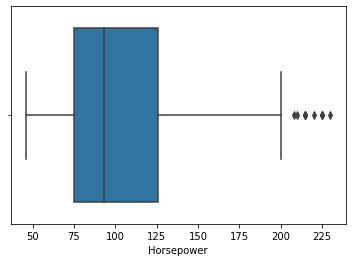

In [ ]:
# looking at horsepower box plot
sns.boxplot(x=data['Horsepower'])

In [ ]:
# imputing the values with median
median = data['Horsepower'].median()
data['Horsepower'] = data['Horsepower'].fillna(median)
data.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

Now, all the null values has been removed

In [ ]:
# category distribution
data['Origin'].value_counts()

1    249
3     79
2     70
Name: Origin, dtype: int64

In [ ]:
data["Cylinders"].value_counts() / len(data)

4    0.512563
8    0.258794
6    0.211055
3    0.010050
5    0.007538
Name: Cylinders, dtype: float64

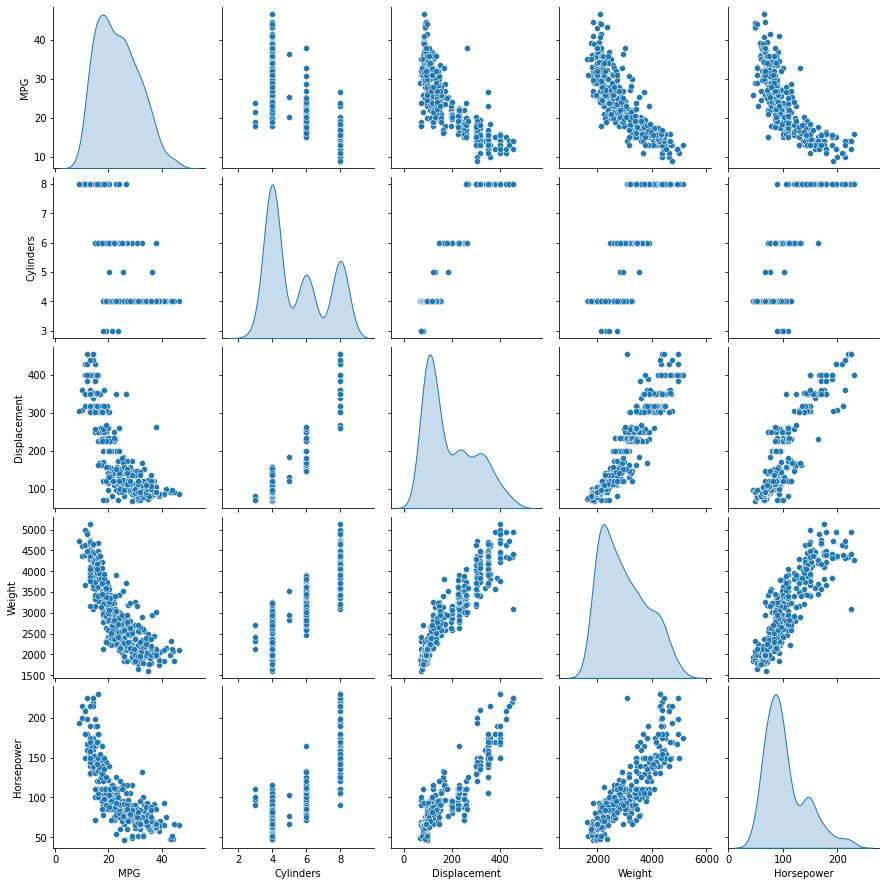

In [ ]:
# pairplots to get an intuition of potential correlations
sns.pairplot(data[["MPG", "Cylinders", "Displacement", "Weight", "Horsepower"]], diag_kind="kde")

In [ ]:
# It is used to divide our dataset into train and test data
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["Cylinders"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [ ]:
# lets look into train and test dataset
strat_train_set.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
145,32.0,4,83.0,61.0,2003.0,19.0,74,3
151,31.0,4,79.0,67.0,2000.0,16.0,74,2
388,26.0,4,156.0,92.0,2585.0,14.5,82,1
48,18.0,6,250.0,88.0,3139.0,14.5,71,1
114,26.0,4,98.0,90.0,2265.0,15.5,73,2


In [ ]:
strat_train_set.shape, strat_test_set.shape

((318, 8), (80, 8))

In [ ]:
# checking for cylinder category distribution in training set
strat_train_set['Cylinders'].value_counts() / len(strat_train_set)

4    0.512579
8    0.257862
6    0.210692
5    0.009434
3    0.009434
Name: Cylinders, dtype: float64

In [ ]:
strat_test_set["Cylinders"].value_counts() / len(strat_test_set)

4    0.5125
8    0.2625
6    0.2125
3    0.0125
Name: Cylinders, dtype: float64

In [ ]:
# creating new features and testing new columns by checking their correlation w.r.t. MPG
data['displacement_on_power'] = data['Displacement'] / data['Horsepower']
data['weight_on_cylinder'] = data['Weight'] / data['Cylinders']
data['acceleration_on_power'] = data['Acceleration'] / data['Horsepower']
data['acceleration_on_cyl'] = data['Acceleration'] / data['Cylinders']

corr_matrix = data.corr()
corr_matrix['MPG'].sort_values(ascending=False)

MPG                      1.000000
acceleration_on_cyl      0.732133
acceleration_on_power    0.704240
Model Year               0.579267
Origin                   0.563450
Acceleration             0.420289
weight_on_cylinder      -0.020778
displacement_on_power   -0.577236
Horsepower              -0.773453
Cylinders               -0.775396
Displacement            -0.804203
Weight                  -0.831741
Name: MPG, dtype: float64

Coorelation: 
* near +1 or -1 are strongly positively or negatively coorelated respectively
* near 0 means poorly coorelated

coorelated means if a value increases then other values will increase or decrease wrt +1 or -1 respectively.

Below two cells are onehotencoding and simpleimputer to transform and fill null values. They are just for explanation. Haven't used them on train or test.

In [ ]:
# onehotencoding the categorical values, it is nearly same as our originDummies() function
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
data_cat_1hot = cat_encoder.fit_transform(data)

data_cat_1hot.toarray()[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# handling missing values, its just as we filled null values above
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer.fit(data)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# replacing all the complicated stuff with this function
def transform_data(temp_df):
  
  # filling null values
  median = temp_df['Horsepower'].median()
  temp_df['Horsepower'] = temp_df['Horsepower'].fillna(median)

  # converting origin into features
  temp_df['Origin'] = temp_df['Origin'].map({1: 'India', 2: 'USA', 3 : 'Germany'})
  temp_df = pd.get_dummies(temp_df, prefix='', prefix_sep='')

  #creating new features
  temp_df['displacement_on_power'] = temp_df['Displacement'] / temp_df['Horsepower']
  temp_df['weight_on_cylinder'] = temp_df['Weight'] / temp_df['Cylinders']
  temp_df['acceleration_on_power'] = temp_df['Acceleration'] / temp_df['Horsepower']
  temp_df['acceleration_on_cyl'] = temp_df['Acceleration'] / temp_df['Cylinders']

  # using standard scalar
  scalar = StandardScaler()
  temp_df = scalar.fit_transform(temp_df)

  return temp_df

In [ ]:
"""
# now, we will try to automate all the things that we have discussed so far
from sklearn.base import BaseEstimator, TransformerMixin

acc_ix, hpower_ix, cyl_ix = 4, 2, 0

# custom class inheriting the BaseEstimator and TransformerMixin
class CustomAttrAdder(BaseEstimator, TransformerMixin):
    def __init__(self, acc_on_power=True):
        self.acc_on_power = acc_on_power  # new optional variable
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        acc_on_cyl = X[:, acc_ix] / X[:, cyl_ix] # required new variable
        if self.acc_on_power:
            acc_on_power = X[:, acc_ix] / X[:, hpower_ix]
            return np.c_[X, acc_on_power, acc_on_cyl] # returns a 2D array
        
        return np.c_[X, acc_on_cyl]
    
attr_adder = CustomAttrAdder(acc_on_power=True)
data_tr_extra_attrs = attr_adder.transform(strat_test_set.values)
data_tr_extra_attrs[0]
"""

'\n# now, we will try to automate all the things that we have discussed so far\nfrom sklearn.base import BaseEstimator, TransformerMixin\n\nacc_ix, hpower_ix, cyl_ix = 4, 2, 0\n\n# custom class inheriting the BaseEstimator and TransformerMixin\nclass CustomAttrAdder(BaseEstimator, TransformerMixin):\n    def __init__(self, acc_on_power=True):\n        self.acc_on_power = acc_on_power  # new optional variable\n    def fit(self, X, y=None):\n        return self  # nothing else to do\n    def transform(self, X):\n        acc_on_cyl = X[:, acc_ix] / X[:, cyl_ix] # required new variable\n        if self.acc_on_power:\n            acc_on_power = X[:, acc_ix] / X[:, hpower_ix]\n            return np.c_[X, acc_on_power, acc_on_cyl] # returns a 2D array\n        \n        return np.c_[X, acc_on_cyl]\n    \nattr_adder = CustomAttrAdder(acc_on_power=True)\ndata_tr_extra_attrs = attr_adder.transform(strat_test_set.values)\ndata_tr_extra_attrs[0]\n'

In [ ]:
"""
from sklearn.pipeline import Pipeline

def num_pipeline_transformer(data):
    '''
    Function to process numerical transformations
    Argument:
        data: original dataframe 
    Returns:
        num_attrs: numerical dataframe
        num_pipeline: numerical pipeline object
        
    '''
    numerics = ['float64', 'int64']

    num_attrs = data.select_dtypes(include=numerics)

    num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attrs_adder', CustomAttrAdder()),
        ('std_scaler', StandardScaler()),
        ])
    return num_attrs, num_pipeline
"""

'\nfrom sklearn.pipeline import Pipeline\n\ndef num_pipeline_transformer(data):\n    \'\'\'\n    Function to process numerical transformations\n    Argument:\n        data: original dataframe \n    Returns:\n        num_attrs: numerical dataframe\n        num_pipeline: numerical pipeline object\n        \n    \'\'\'\n    numerics = [\'float64\', \'int64\']\n\n    num_attrs = data.select_dtypes(include=numerics)\n\n    num_pipeline = Pipeline([\n        (\'imputer\', SimpleImputer(strategy="median")),\n        (\'attrs_adder\', CustomAttrAdder()),\n        (\'std_scaler\', StandardScaler()),\n        ])\n    return num_attrs, num_pipeline\n'

In [ ]:
"""
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer

def pipeline_transformer(data):
    '''
    Complete transformation pipeline for both
    nuerical and categorical data.
    
    Argument:
        data: original dataframe 
    Returns:
        prepared_data: transformed data, ready to use
    '''
    cat_attrs = ["Origin"]
    num_attrs, num_pipeline = num_pipeline_transformer(data)
    full_pipeline = ColumnTransformer([
        ("num", num_pipeline, list(num_attrs)),
        ("cat", OneHotEncoder(), cat_attrs),
        ])
    prepared_data = full_pipeline.fit_transform(data)
    return prepared_data
  """

'\nfrom sklearn.compose import ColumnTransformer\nfrom sklearn.preprocessing import Normalizer\n\ndef pipeline_transformer(data):\n    \'\'\'\n    Complete transformation pipeline for both\n    nuerical and categorical data.\n    \n    Argument:\n        data: original dataframe \n    Returns:\n        prepared_data: transformed data, ready to use\n    \'\'\'\n    cat_attrs = ["Origin"]\n    num_attrs, num_pipeline = num_pipeline_transformer(data)\n    full_pipeline = ColumnTransformer([\n        ("num", num_pipeline, list(num_attrs)),\n        ("cat", OneHotEncoder(), cat_attrs),\n        ])\n    prepared_data = full_pipeline.fit_transform(data)\n    return prepared_data\n  '

In [ ]:
"""
##from raw data to processed data in 2 steps
preprocessed_df = preprocess_origin_cols(data)
preprocessed_df = pd.get_dummies(preprocessed_df, prefix='', prefix_sep='')
prepared_data = pipeline_transformer(preprocessed_df)
prepared_data
"""

"\n##from raw data to processed data in 2 steps\npreprocessed_df = preprocess_origin_cols(data)\npreprocessed_df = pd.get_dummies(preprocessed_df, prefix='', prefix_sep='')\nprepared_data = pipeline_transformer(preprocessed_df)\nprepared_data\n"

In [ ]:
x = df.drop("MPG",axis=1)
y = df["MPG"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
x_train = transform_data(x_train)
x_test = transform_data(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

##testing the predictions with first 5 rows
# sample_data = data.iloc[:5]
# sample_labels = preprocessed_df.iloc[:5]
# sample_data_prepared = pipeline_transformer(sample_data)

# strat_test_set = preprocess_origin_cols(strat_test_set)
# strat_test_set = pd.get_dummies(strat_test_set, prefix='', prefix_sep='')
# sample_data_prepared = strat_test_set.drop("MPG",axis=1)
print("Prediction of samples: ", lin_reg.predict(x_test))

Prediction of samples:  [33.92640933 27.82783362 18.15693706 15.85981339 12.38179657 26.31890745
 25.22005727 13.31759611 14.18686689 19.04416208 13.94357035 36.0505226
 26.2495731  13.28065456 21.94200234 10.60201638 28.3494914  23.8384658
 17.12701275 36.04459195 22.88186475 16.59999689 25.44955596 28.92287114
 12.52203691 36.84152901 25.79438589 22.24950471 19.7254864  11.66257846
 25.95754042 35.13766832 15.93502759 24.40661938 34.52192788 14.79360601
 21.51407479 18.61205649 13.2399679  27.12134306 25.02616183 29.21453078
 18.89695776  9.49712408 22.56001245 32.93756279 26.68600042 23.24550872
 22.16392027 28.702028   20.76537515 34.04682021 31.23188838 12.37734931
 26.51389381 11.7873026  18.06422318 26.7320286  21.69210099 17.86169236
 15.41857112 33.19174421 21.82040179 18.80942197 18.45210278 24.19569982
 22.03764188 32.95575412 29.07917219 11.86716044 31.32898546 12.74628976
 12.32429061 16.54460181 25.27083114 17.70570018 18.09300438 27.7560535
 30.91442301 17.2924521  13.10

In [ ]:
from sklearn.metrics import mean_squared_error

predictions = lin_reg.predict(x_test)
lin_mse = mean_squared_error(y_test, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2.622218804875837